In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from ganrec.propagators import TomoRadon


(6, 1, 128, 128)


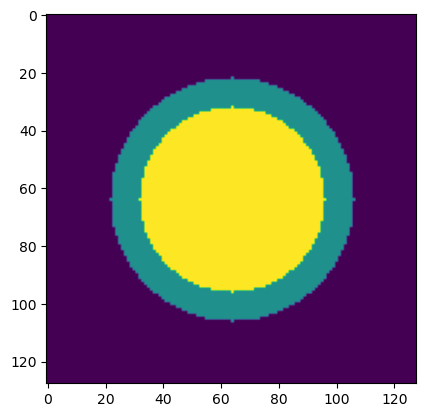

In [2]:
strain_tensor = np.load('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_tensor.npy')
print(strain_tensor.shape)
plt.imshow(strain_tensor[0,0,:,:])
plt.show()

In [3]:
num_angles = 180
  # Out of plane rotation
psi = 90

    # Convert from degree to radian
angles = np.linspace(0, 180, num_angles)
angles = angles * np.pi / 180
psi = psi * np.pi / 180
num_ang = len(angles)
detector_rows = strain_tensor.shape[1]
detector_columns = strain_tensor.shape[2]

In [4]:
vol_mask = np.zeros((detector_rows, detector_columns, detector_columns))
vol_mask = 1 * (np.sum(np.absolute(strain_tensor), axis=0) > 0.0)
print(vol_mask.shape)
vol_mask = np.reshape(vol_mask, (vol_mask.shape[0], vol_mask.shape[1], vol_mask.shape[2], 1))
vol_mask = tf.cast(vol_mask, dtype=tf.float32)
angles = tf.cast(angles, dtype=tf.float32)

(1, 128, 128)


2024-05-07 18:11:18.859548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 18:11:18.859802: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 18:11:18.860002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 18:11:18.867721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 18:11:18.867929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

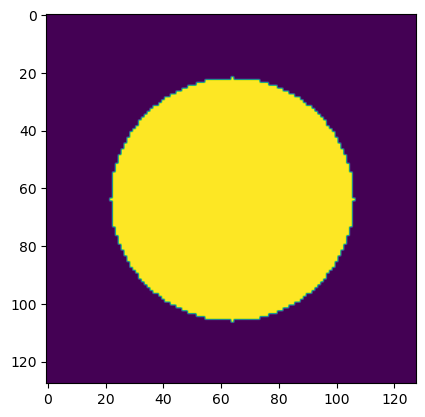

In [29]:
plt.imshow(vol_mask[0,:,:])
plt.show()

In [31]:
print(vol_mask.numpy().max(), vol_mask.numpy().min())

1.0 0.0


(1, 180, 128, 1)


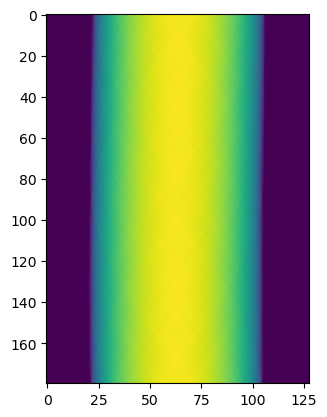

In [33]:
thickness = TomoRadon(vol_mask, angles).compute()
print(thickness.shape)
plt.imshow(thickness[0, :, :, 0])
plt.show()

In [35]:
thickness = tf.squeeze(thickness)


In [19]:
tifffile.imwrite('/nsls2/users/xyang4/data_tmp/tensor_tomography/thickness_tf.tiff', thickness.numpy())

In [7]:
strain_tensor = tf.transpose(strain_tensor, [0, 2, 3, 1])
proj_strain_comp = TomoRadon(strain_tensor, angles).compute()
print(proj_strain_comp.shape)

(6, 180, 128, 1)


In [8]:
proj_strain_comp = tf.squeeze(proj_strain_comp)
print(proj_strain_comp.shape)


(6, 180, 128)


In [9]:
print(proj_strain_comp[0].shape)
print(tf.pow(tf.cos(angles), 2).shape) 
print(tf.pow(tf.cos(angles), 2) * tf.pow(tf.sin(psi), 2).shape)


(180, 128)
(180,)


TypeError: Cannot convert TensorShape () to dtype <dtype: 'float32'>. Allowed dtypes are tf.int32 and tf.int64.

In [20]:
tf.multiply(proj_strain_comp[0], tf.expand_dims(tf.pow(tf.cos(angles), 2), 1))

<tf.Tensor: shape=(180, 128), dtype=float32, numpy=
array([[-0.22297782, -0.22297782, -0.22297782, ..., -0.22297782,
        -0.22297782, -0.22297782],
       [-0.22290914, -0.22290914, -0.22290914, ..., -0.22290914,
        -0.22290914, -0.22290914],
       [-0.22270319, -0.22270319, -0.22270319, ..., -0.22270319,
        -0.22270319, -0.22270319],
       ...,
       [-0.22270319, -0.22270319, -0.22270319, ..., -0.22270319,
        -0.22270319, -0.22270319],
       [-0.22290914, -0.22290914, -0.22290914, ..., -0.22290914,
        -0.22290914, -0.22290914],
       [-0.22297782, -0.22297782, -0.22297782, ..., -0.22297782,
        -0.22297782, -0.22297782]], dtype=float32)>

In [20]:
tf.multiply(proj_strain_comp[0], tf.cast(tf.pow(tf.cos(angles), 2), dtype = tf.float32)*tf.cast(tf.pow(tf.sin(psi), 2), dtype=tf.float32))

<tf.Tensor: shape=(180, 128, 180), dtype=float32, numpy=
array([[[-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        ...,
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782]],

       [[-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        [-0.22297782, -0.22290914, -0.22270319, ..., -0.22270319,
         -0.22290914, -0.22297782],
        ..

In [26]:
tf.multiply(proj_strain_comp[2], tf.pow(tf.cos(psi), 2), 1)

<tf.Tensor: shape=(180, 128), dtype=float32, numpy=
array([[-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16],
       [-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16],
       [-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16],
       ...,
       [-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16],
       [-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16],
       [-4.2604047e-16, -4.2604047e-16, -4.2604047e-16, ...,
        -4.2604047e-16, -4.2604047e-16, -4.2604047e-16]], dtype=float32)>

In [10]:
proj_strain_ws = tf.multiply(proj_strain_comp[0], tf.expand_dims(tf.pow(tf.cos(angles), 2) * tf.pow(tf.sin(psi), 2), 1)) + \
                 tf.multiply(proj_strain_comp[1], tf.expand_dims(tf.pow(tf.sin(angles), 2) * tf.pow(tf.sin(psi), 2), 1)) + \
                 tf.multiply(proj_strain_comp[2], tf.pow(tf.cos(psi), 2), 1) + \
                 tf.multiply(proj_strain_comp[3], tf.expand_dims(tf.sin(2 * angles) * tf.pow(tf.sin(psi), 2), 1)) + \
                 tf.multiply(proj_strain_comp[4], tf.expand_dims(tf.sin(angles) * tf.sin(2 * psi), 1)) + \
                 tf.multiply(proj_strain_comp[5], tf.expand_dims(tf.cos(angles) * tf.sin(2 * psi), 1))

In [20]:
tifffile.imwrite('/nsls2/users/xyang4/data_tmp/tensor_tomography/proj_strain_ws_tf.tiff', proj_strain_ws.numpy())

In [11]:
print(proj_strain_ws.shape)

(180, 128)


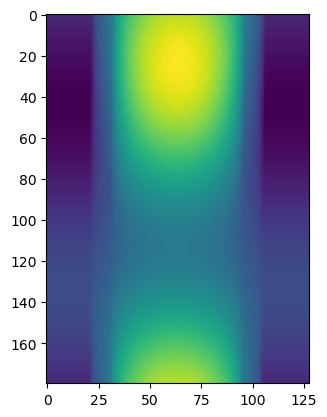

In [12]:
plt.imshow(proj_strain_ws)
plt.show()

In [26]:
def tfnor_tomo(img):
    # img = tf.image.per_image_standardization(img)
        # img = img / tf.reduce_max(img)
        # img = img - tf.reduce_min(img)
    img = (img - tf.reduce_min(img)) / (tf.reduce_max(img) - tf.reduce_min(img))
    return img

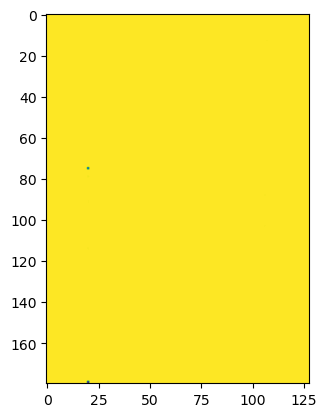

In [36]:
strain_sino = tf.math.divide_no_nan(proj_strain_ws, tfnor_tomo(thickness))
plt.imshow(strain_sino)
plt.show()

In [37]:
import tifffile
tifffile.imwrite('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_sino_tf_2.tiff', strain_sino.numpy())

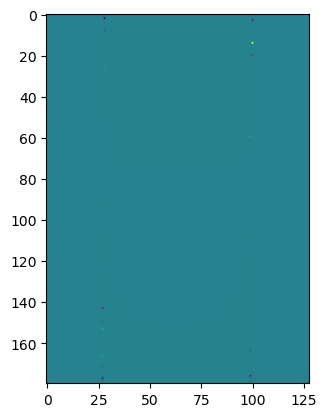